In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana_pentads


In [ ]:

fname = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/ASCAT_M36.ldas_log.20200601_0000z.txt'

In [ ]:
# Open the file for reading
with open(fname, 'r') as f:
    # Initialize an empty list to store the extracted data
    data = []
    # Loop through each line in the file
    for line in f:
        # Check if the line starts with "Found!"
        if line.startswith('Found!'):
            # Extract the numbers in the remaining columns
            columns = line.strip().split()[1:]
            numbers = [float(col) for col in columns]
            # Append the numbers to the data list
            data.append(numbers)

In [ ]:
# Convert the data list to a NumPy array
data_array = np.array(data)


In [ ]:
# Split the 2D array into 10 separate arrays
i = data_array[:, 0]
pp = data_array[:, 1]
j_ind = data_array[:, 2]
i_ind = data_array[:, 3]
tmp_obs = data_array[:, 4]
sclprm_mean_obs = data_array[:, 5]
sclprm_std_mod = data_array[:, 6]
sclprm_std_obs = data_array[:, 7]
sclprm_mean_mod = data_array[:, 8]
tmp_std_obs = data_array[:, 9]

In [ ]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=5)

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()


In [ ]:
# Calculate tmpreal by dividing sclprm_std_mod by sclprm_std_obs
tmpreal = sclprm_std_mod / sclprm_std_obs

# Calculate tmp_obs2 using the formula sclprm_mean_mod + tmpreal*(tmp_obs-sclprm_mean_obs)
tmp_obs2 = sclprm_mean_mod + tmpreal * (tmp_obs - sclprm_mean_obs)

In [ ]:
# Create a scatter plot of tmp_obs against sclprm_mean_mod
plt.scatter(sclprm_mean_mod, tmp_obs, s=10)

# Create a scatter plot of tmp_obs2 against sclprm_mean_mod in a different color
plt.scatter(sclprm_mean_mod, tmp_obs2, s=10, c='r')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')

# Add a dashed line for the 1:1 line
x = np.linspace(0, 1, 100)
plt.plot(x, x, '--', color='gray')

# Display the plot
plt.show()



In [ ]:
# Create a line plot of sclprm_mean_mod against tmp_obs
plt.plot(tmp_obs, label='tmp_obs')

# Create a line plot of sclprm_mean_mod against tmp_obs2 in a different color
plt.plot(tmp_obs2, label='tmp_obs2')

# Set the x and y axis labels
plt.xlabel('sclprm_mean_mod')
plt.ylabel('tmp_obs')

# Set the axis limits and aspect ratio
plt.ylim([0, 1])

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [2]:
# Read ObsFcstAna files
path = '/discover/nobackup/amfox/Experiments/ASCAT_scale_test_debug_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar, pentad2 = read_obsfcstana_pentads(path, file_name_start, printflag)

np.savez_compressed('OFA_2015_scaled_v3.npz', date_time_15=date_time, obs_species_15=obs_species, obs_tilenum_15=obs_tilenum, obs_lon_15=obs_lon, obs_lat_15=obs_lat, obs_obs_15=obs_obs, 
                    obs_obsvar_15=obs_obsvar, obs_fcst_15=obs_fcst, obs_fcstvar_15=obs_fcstvar, obs_ana_15=obs_ana, obs_anavar_15=obs_anavar, pentad2_15=pentad2)

Total number of obs =  7215095


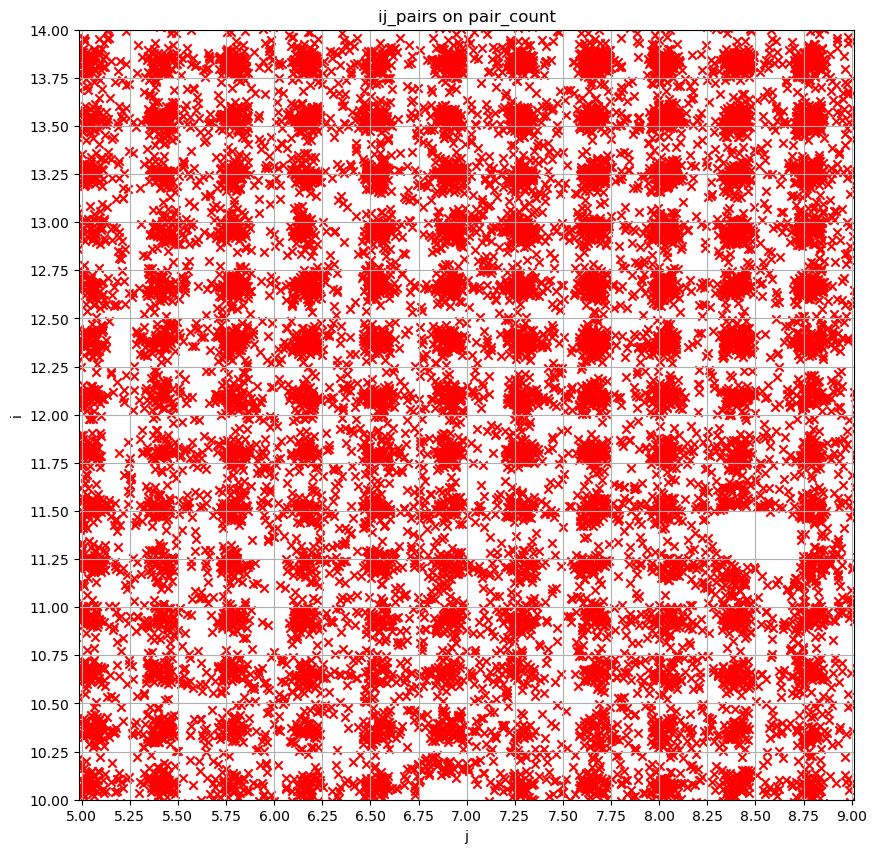

In [7]:
fig, axs = plt.subplots(figsize=(10, 10))

# Plot the ij_pairs on top of the pair_count array
plt.scatter(obs_lon, obs_lat, color='red', marker='x')
plt.xlabel('j')
plt.ylabel('i')
plt.title('ij_pairs on pair_count')
plt.grid(True)

# Force the axis to be square
plt.axis('equal')

# Set the x-axis and y-axis limits
plt.xlim(5, 9)  # Adjust the limits as needed
plt.ylim(10, 14)  # Adjust the limits as needed

# Set the x-axis and y-axis ticks with 0.25 spacing
plt.xticks(np.arange(5, 9.25, 0.25))
plt.yticks(np.arange(10, 14.25, 0.25))

# Show the plot
plt.show()

In [2]:
# Read ObsFcstAna files
path = '/discover/nobackup/amfox/Experiments/ASCAT_scale_test_debug_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar, pentad2 = read_obsfcstana_pentads(path, file_name_start, printflag)

np.savez_compressed('OFA_2016_scaled_v3.npz', date_time_16=date_time, obs_species_16=obs_species, obs_tilenum_16=obs_tilenum, obs_lon_16=obs_lon, obs_lat_16=obs_lat, obs_obs_16=obs_obs, 
                    obs_obsvar_16=obs_obsvar, obs_fcst_16=obs_fcst, obs_fcstvar_16=obs_fcstvar, obs_ana_16=obs_ana, obs_anavar_16=obs_anavar, pentad2_16=pentad2)

Total number of obs =  13517367


In [5]:
# Read ObsFcstAna files
path = '/discover/nobackup/amfox/Experiments/ASCAT_scale_test_debug_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2017'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar, pentad2 = read_obsfcstana_pentads(path, file_name_start, printflag)

np.savez_compressed('OFA_2017_scaled_v2.npz', date_time_17=date_time, obs_species_17=obs_species, obs_tilenum_17=obs_tilenum, obs_lon_17=obs_lon, obs_lat_17=obs_lat, obs_obs_17=obs_obs, 
                    obs_obsvar_17=obs_obsvar, obs_fcst_17=obs_fcst, obs_fcstvar_17=obs_fcstvar, obs_ana_17=obs_ana, obs_anavar_17=obs_anavar, pentad2_17=pentad2)

Total number of obs =  6331003


In [2]:
OFA_2015 = np.load('OFA_2015.npz')
OFA_2016 = np.load('OFA_2016.npz')
OFA_2017 = np.load('OFA_2017.npz')

obs_lat_15 = OFA_2015['obs_lat_15']
obs_lat_16 = OFA_2016['obs_lat_16']
obs_lat_17 = OFA_2017['obs_lat_17']
obs_lat = np.concatenate([obs_lat_15, obs_lat_16, obs_lat_17])

obs_lon_15 = OFA_2015['obs_lon_15']
obs_lon_16 = OFA_2016['obs_lon_16']
obs_lon_17 = OFA_2017['obs_lon_17']
obs_lon = np.concatenate([obs_lon_15, obs_lon_16, obs_lon_17])

obs_obs_15 = OFA_2015['obs_obs_15']
obs_obs_16 = OFA_2016['obs_obs_16']
obs_obs_17 = OFA_2017['obs_obs_17']
obs_obs = np.concatenate([obs_obs_15, obs_obs_16, obs_obs_17])

obs_fcst_15 = OFA_2015['obs_fcst_15']
obs_fcst_16 = OFA_2016['obs_fcst_16']
obs_fcst_17 = OFA_2017['obs_fcst_17']
obs_fcst = np.concatenate([obs_fcst_15, obs_fcst_16, obs_fcst_17])

obs_obsvar_15 = OFA_2015['obs_obsvar_15']
obs_obsvar_16 = OFA_2016['obs_obsvar_16']
obs_obsvar_17 = OFA_2017['obs_obsvar_17']
obs_obsvar = np.concatenate([obs_obsvar_15, obs_obsvar_16, obs_obsvar_17])

pentad2_15 = OFA_2015['pentad2_15']
pentad2_16 = OFA_2016['pentad2_16']
pentad2_17 = OFA_2017['pentad2_17']
pentad2 = np.concatenate([pentad2_15, pentad2_16, pentad2_17])



In [3]:
# Open the netCDF file using xarray
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/ASCAT_3Y_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_v2/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')

sclprm_mean_obs_3D = ds['o_mean'].values
sclprm_mean_mod_3D = ds['m_mean'].values
sclprm_std_obs_3D = ds['o_std'].values
sclprm_std_mod_3D = ds['m_std'].values

In [4]:
#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

n_obs = len(obs_obs)
tmp_obs = obs_obs.copy()
tmp_std_obs = obs_obsvar.copy()

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

In [5]:

for i in range(len(obs_obs)):
    this_lon = obs_lon[i]   
    this_lat = obs_lat[i]  
    i_ind = int((this_lon - ll_lon)/dlon + 1) # Add 1 to ceil equivalent in Fortran
    j_ind = int((this_lat - ll_lat)/dlat + 1) # Add 1 to ceil equivalent in Fortran
    
    # sclprm_mean_obs = ds['o_mean'].sel(pentad = pentad2[i]).values
    # sclprm_mean_mod = ds['m_mean'].sel(pentad = pentad2[i]).values
    # sclprm_std_obs = ds['o_std'].sel(pentad = pentad2[i]).values
    # sclprm_std_mod = ds['m_std'].sel(pentad = pentad2[i]).values

    sclprm_mean_obs = sclprm_mean_obs_3D[int(pentad2[i]-1), :, :]
    sclprm_mean_mod = sclprm_mean_mod_3D[int(pentad2[i]-1), :, :]
    sclprm_std_obs = sclprm_std_obs_3D[int(pentad2[i]-1), :, :]
    sclprm_std_mod = sclprm_std_mod_3D[int(pentad2[i]-1), :, :]

    if (sclprm_mean_obs[i_ind, j_ind] > 0 and sclprm_mean_mod[i_ind, j_ind] > 0 and
    sclprm_std_obs[i_ind, j_ind] >= 0 and sclprm_std_mod[i_ind, j_ind] >= 0):
        # Scale via standard normal deviates
        tmpreal = sclprm_std_mod[i_ind, j_ind] / sclprm_std_obs[i_ind, j_ind]
        tmp_obs[i] = sclprm_mean_mod[i_ind, j_ind] + tmpreal * (tmp_obs[i] - sclprm_mean_obs[i_ind, j_ind])
        # Scale observation error std
        tmp_std_obs[i] = tmpreal * tmp_std_obs[i]

        i_out[i] = i_ind
        j_out[i] = j_ind
        
    else:
        tmp_obs[i] = -9999.9


idx = np.where(tmp_obs >= -9999)


In [6]:
num_values = len(idx[0])
print("Number of values that meet the criteria: ", num_values)

# Generate data
data2 = tmp_obs[idx]
data1 = obs_obs[idx]
data3 = obs_fcst[idx]

Number of values that meet the criteria:  10304107


 Saving figure as obs_dis_cnt.png 



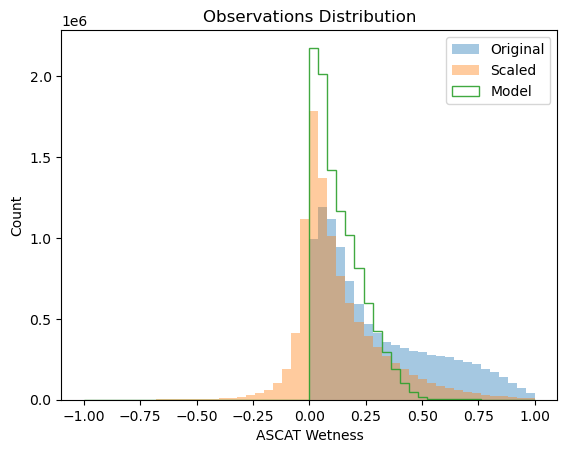

In [7]:

# Define bin edges
bin_edges = np.linspace(-1, 1, 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Count')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [ ]:
import numpy as np

# Example input data
i_indices = np.array([1, 1, 2, 3, 3, 3])
j_indices = np.array([2, 2, 3, 1, 1, 2])
observations = np.array([10, 20, 30, 40, 50, 60])

# Get unique pairs of (i, j) indices
unique_pairs, indices = np.unique(np.column_stack((i_indices, j_indices)), axis=0, return_inverse=True)

# Group observations by (i, j) pairs
grouped_observations = np.zeros(len(unique_pairs))
for i in range(len(unique_pairs)):
    mask = (indices == i)
    observations_for_pair = observations[mask]
    grouped_observations[i] = np.sum(observations_for_pair)

# Print the result
print("Grouped observations:")
print(grouped_observations)

In [ ]:
observations_by_pair = {}
for i, j, obs in zip(i_indices, j_indices, observations):
    pair = (i, j)
    if pair in observations_by_pair:
        observations_by_pair[pair].append(obs)
    else:
        observations_by_pair[pair] = [obs]

observations_by_pair[(3, 1)]

In [8]:
indices_i = i_out.astype(int)
indices_j = j_out.astype(int)
observations = obs_obs

pair_count = np.zeros((indices_i.max()+1, indices_j.max()+1))

observations_by_pair = {}

for i, j, obs in zip(indices_i, indices_j, observations):
    if i != 0 or j != 0:
        if (i, j) in observations_by_pair:
            observations_by_pair[(i, j)].append(obs)
        else:
            observations_by_pair[(i, j)] = [obs]

        pair_count[int(i), int(j)] += 1

# Print counts for each pair
#for pair, count in np.ndenumerate(pair_count):
#    print(f"Pair {pair}: {count} observations")    

In [9]:
# Find pair with the most observations
max_pair = np.unravel_index(np.argmax(pair_count), pair_count.shape)
print(f"Pair {max_pair} has the most observations ({pair_count[max_pair]}).")

Pair (472, 218) has the most observations (1229.0).


In [10]:
# Get indices of the top 10 pairs with the most counts
n_top_pairs = 10
flat_counts = pair_count.flatten()
top_indices = np.argpartition(flat_counts, -n_top_pairs)[-n_top_pairs:]
top_pairs = np.unravel_index(top_indices, pair_count.shape)

# Print the top 10 pairs and their counts
for i, j in zip(top_pairs[0], top_pairs[1]):
    count = pair_count[i, j]
    print(f"Pair ({i}, {j}) has {count} observations.")

Pair (469, 218) has 1171.0 observations.
Pair (1183, 246) has 1179.0 observations.
Pair (472, 222) has 1174.0 observations.
Pair (802, 262) has 1181.0 observations.
Pair (475, 222) has 1195.0 observations.
Pair (729, 562) has 1203.0 observations.
Pair (466, 225) has 1205.0 observations.
Pair (475, 225) has 1209.0 observations.
Pair (472, 218) has 1229.0 observations.
Pair (472, 221) has 1214.0 observations.


In [11]:
#plt.imshow(pair_count, cmap='coolwarm')
#plt.colorbar()
#plt.show()

# Find indices of observations for max_pair
max_pair_indices = []
for idx, (i, j) in enumerate(zip(indices_i, indices_j)):
    if i == max_pair[0] and j == max_pair[1]:
        max_pair_indices.append(idx)

# Print indices of observations for max_pair
#print(f"Indices of observations for pair {max_pair}: {max_pair_indices}")

#print(observations[max_pair_indices])

In [12]:
max_pair_indices = []
for idx, (i, j) in enumerate(zip(indices_i, indices_j)):
    if i == 472 and j == 221:
        max_pair_indices.append(idx)

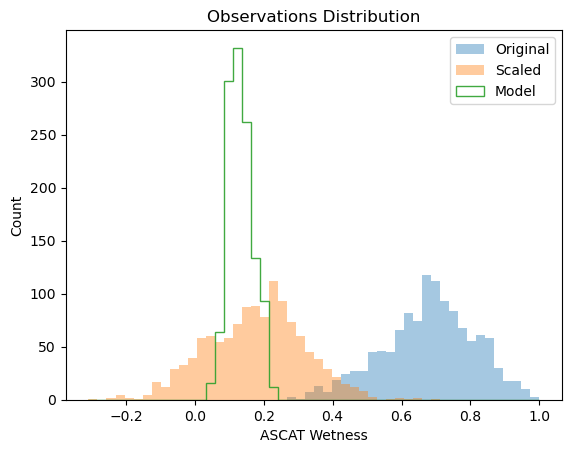

(0.6787291318914643, 0.1777327714030619, 0.13077606405921685)

In [13]:
data1 = obs_obs[max_pair_indices]
data2 = tmp_obs[max_pair_indices]
data3 = obs_fcst[max_pair_indices]

# Define bin edges
combined_data = np.concatenate([data1, data2, data3])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Count')
ax.set_title('Observations Distribution')
ax.legend()

# savename = 'obs_dis_cnt.png'
# print(" Saving figure as", savename, "\n")
# plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

np.nanmean(data1), np.nanmean(data2), np.nanmean(data3)


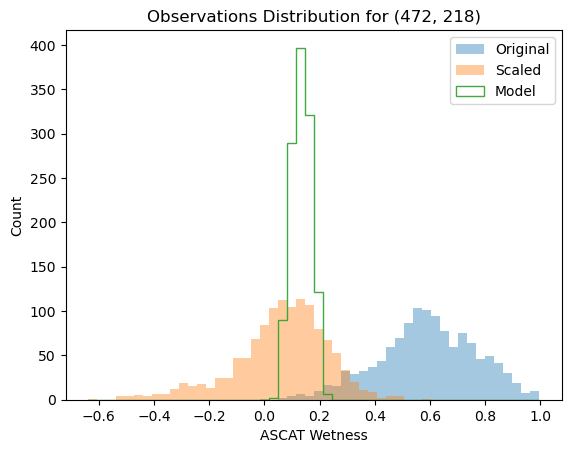

Means for (472, 218): 0.5882016551136012, 0.06164565618728519, 0.13244003008981367



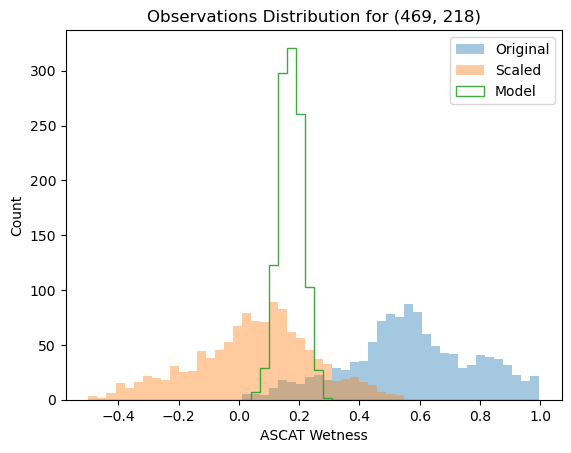

Means for (469, 218): 0.5685044121725705, 0.05160911065822538, 0.1719258813446755



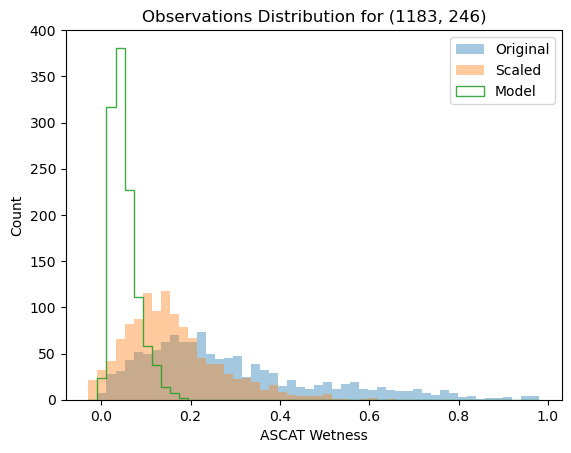

Means for (1183, 246): 0.28732407401741245, 0.15746903300164297, 0.05103706001233787



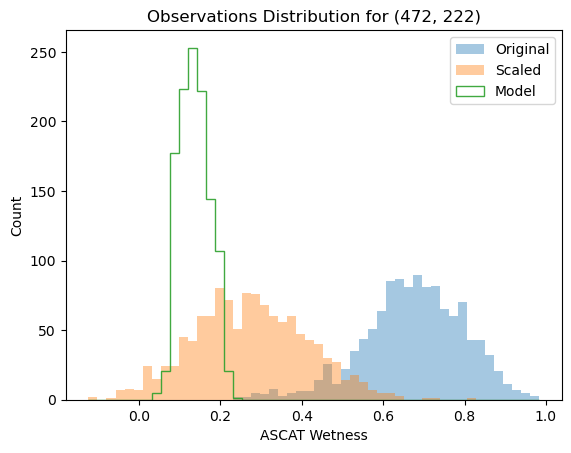

Means for (472, 222): 0.6745845409938384, 0.2740433572381245, 0.1351990252860157



In [14]:
# Define indices to loop over
pairs = [(472, 218), (469, 218), (1183, 246), (472, 222)]

# Loop over pairs and create subplots
for i, pair in enumerate(pairs):
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == pair[0] and jj == pair[1]:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices]
    data2 = tmp_obs[max_pair_indices]
    data3 = obs_fcst[max_pair_indices]

    # Define bin edges
    combined_data = np.concatenate([data1, data2, data3])
    bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

    # Create subplot
    fig, ax = plt.subplots()

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution for ({}, {})'.format(pair[0], pair[1]))
    ax.legend()

    # savename = 'obs_dis_cnt.png'
    # print(" Saving figure as", savename, "\n")
    # plt.savefig(savename, dpi = 400)  

    # Show plot
    plt.show()

    print("Means for ({}, {}): {}, {}, {}\n".format(pair[0], pair[1], np.nanmean(data1), np.nanmean(data2), np.nanmean(data3)))


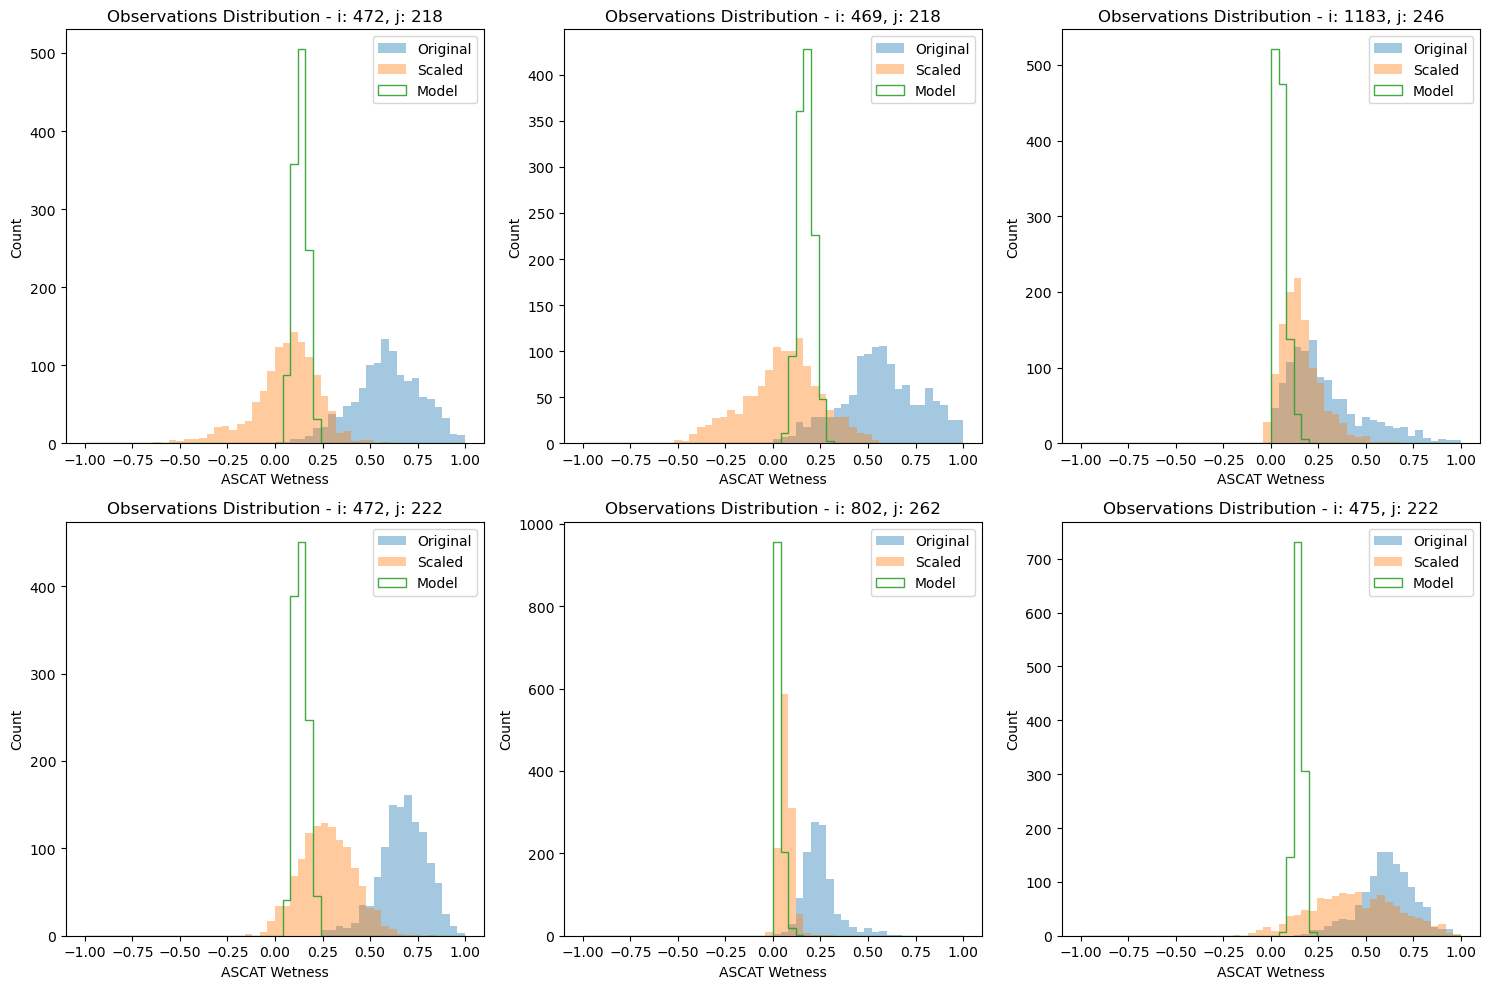

In [15]:
# Define the i, j pairs
ij_pairs = [(472, 218), (469, 218), (1183, 246), (472, 222), (802, 262), (475, 222)]

# Define bin edges
bin_edges = np.linspace(-1, 1, 51)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop over each subplot and plot the data
for idx, ax in enumerate(axs.flat):
    i, j = ij_pairs[idx]
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == i and jj == j:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices]
    data2 = tmp_obs[max_pair_indices]
    data3 = obs_fcst[max_pair_indices]

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')
    n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Model', histtype='step')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('Observations Distribution - i: {}, j: {}'.format(i, j))
    ax.legend()

plt.tight_layout()
plt.show()


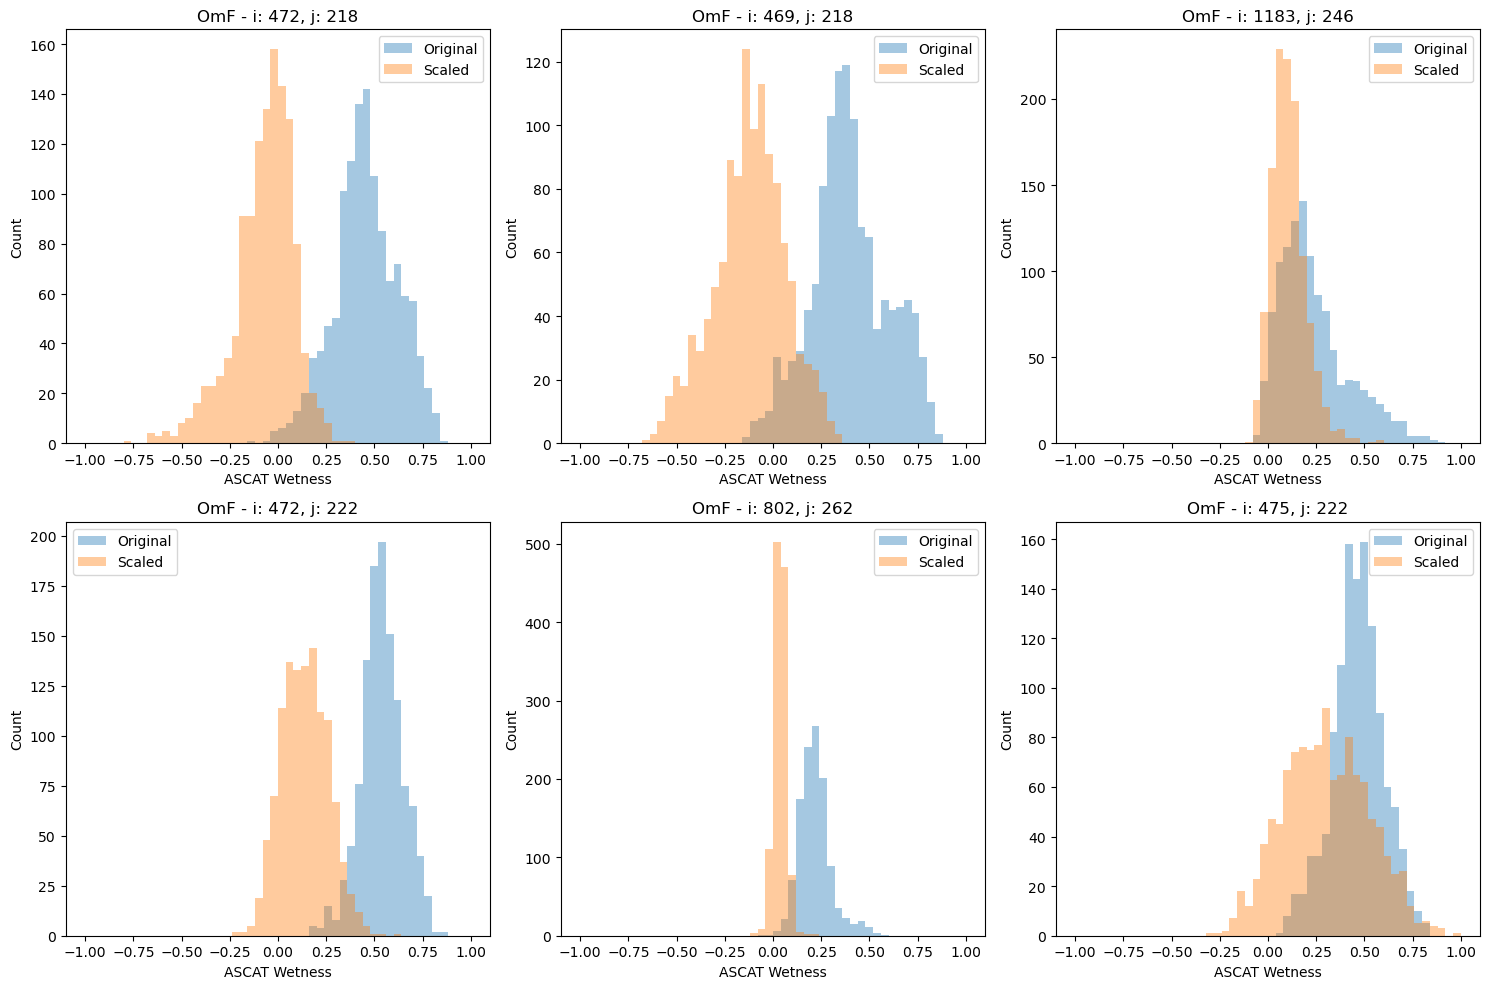

In [18]:
# Define the i, j pairs
ij_pairs = [(472, 218), (469, 218), (1183, 246), (472, 222), (802, 262), (475, 222)]

# Define bin edges
bin_edges = np.linspace(-1, 1, 51)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop over each subplot and plot the data
for idx, ax in enumerate(axs.flat):
    i, j = ij_pairs[idx]
    max_pair_indices = []
    for idx, (ii, jj) in enumerate(zip(indices_i, indices_j)):
        if ii == i and jj == j:
            max_pair_indices.append(idx)
    data1 = obs_obs[max_pair_indices] - obs_fcst[max_pair_indices]
    data2 = tmp_obs[max_pair_indices] - obs_fcst[max_pair_indices]

    n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Original')
    n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

    # Add labels and title
    ax.set_xlabel('ASCAT Wetness')
    ax.set_ylabel('Count')
    ax.set_title('OmF - i: {}, j: {}'.format(i, j))
    ax.legend()

plt.tight_layout()
plt.show()
